# NYC Traffic Accidents Analysis (2020)

## Project Overview

**Objective:**
Identify key patterns across accidents across New York City, including data about accident frequency by time, location, and potential contributing factors and aims to find the period of time when the least amount of accidents occur.

Completed by Reyhan Quayum on February 27, 2023

**Scope:**

* **Population:** NYC residents and commuters involved in traffic accidents
* **Discipline:** Transportation Safety, Data Analysis, Urban Planning
* **Geographic Focus:** New York City
* **Time Frame:** January 2020 – December 2020
* **Data Requirements:** Dataset containing detailed records of at least 10,000 reported traffic accidents, including demographic details, location, and contributing factors

**Data Sources:**
The analysis uses publicly available data from NYC Open Data and official NYC Department of Transportation (DOT)


## Data Set Description

**Name:** NYC Motor Vehicle Collisions
**Source & Access:** [NYC Motor Vehicle Collisions Dataset on NYC Open Data](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data)

**Details:**

* **Author / Creator:** New York Police Department (NYPD)
* **Publication Date:** Originally published January 2020; latest update December 2020
* **Publisher:** NYC Open Data
* **Data Accessed:** May 26, 2023
* **Format:** csv
* **Size:** 1,420 KB
* **Number of Records:** 7,480
* **License:** *\[To be confirmed]*

**Usage:**
This dataset is suitable for analyzing traffic accident trends in NYC, including accident frequency by location and time, types of vehicles involved, contributing factors, and demographic information of involved parties. It supports research in transportation safety, urban planning, and public policy.

## Data Extraction and Transformation

### Columns Used

The analysis focuses on key columns from the dataset, including but not limited to:

* **Date and Time:** To analyze accident trends over time
* **Borough / Location:** To identify geographic hotspots for accidents
* **Contributing Factors:** To understand causes of accidents (e.g., speeding, distracted driving)
* **Persons Injured / Killed:** To assess accident severity
* **Vehicle Type(s) Involved:** To identify which types of vehicles are most frequently involved
* **Victim Demographics:** Age, gender, and if available, race/ethnicity (depending on dataset availability)

### Data Types and Conversion

* Date and time fields will be converted to datetime types for chronological analysis.
* Numerical fields such as number of injuries or fatalities will be stored as integers.
* Categorical fields (vehicle type, borough, contributing factors) will be processed as strings or categorical variables.

### Data Cleaning and Normalization

* Check for missing or inconsistent values in critical columns (e.g., location, injury counts).
* Standardize labels for contributing factors and vehicle types to ensure uniform grouping.
* Handle any erroneous or outlier data points by verification or exclusion.

### Additional Processing

* Aggregate accidents by year, month, borough, and time of day to identify peak accident periods.
* Identify demographic groups most affected by traffic accidents (e.g., by age or gender).
* Analyze correlations between contributing factors and accident severity.

## Process and Code

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

Header row had to be specified to line number 4 of the csv file to fix the issue

In [20]:
df = pd.read_csv('../data/raw/NYC_Accidents_2020.csv', header=3)
print(df)

      CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0        8/29/20   15:40:00      BRONX   10466.0  40.892100 -73.833760   
1        8/29/20   21:00:00   BROOKLYN   11221.0  40.690500 -73.919914   
2        8/29/20   18:20:00        NaN       NaN  40.816500 -73.946556   
3        8/29/20    0:00:00      BRONX   10459.0  40.824720 -73.892960   
4        8/29/20   17:10:00   BROOKLYN   11203.0  40.649890 -73.933890   
...          ...        ...        ...       ...        ...        ...   
74876     1/1/20   15:13:00      BRONX   10459.0  40.826810 -73.896510   
74877     1/1/20    8:00:00   BROOKLYN   11235.0  40.582935 -73.959210   
74878     1/1/20   11:36:00      BRONX   10461.0  40.848553 -73.830055   
74879     1/1/20    1:45:00  MANHATTAN   10017.0  40.753624 -73.969440   
74880     1/1/20   18:00:00     QUEENS   11367.0  40.726875 -73.830960   

                           LOCATION   ON STREET NAME CROSS STREET NAME  \
0         POINT (-73.83376 40.8921)  

## Data Sampling

In [21]:
print(df.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


In [22]:
print(df.head(5))

  CRASH DATE CRASH TIME   BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  \
0    8/29/20   15:40:00     BRONX   10466.0  40.89210 -73.833760   
1    8/29/20   21:00:00  BROOKLYN   11221.0  40.69050 -73.919914   
2    8/29/20   18:20:00       NaN       NaN  40.81650 -73.946556   
3    8/29/20    0:00:00     BRONX   10459.0  40.82472 -73.892960   
4    8/29/20   17:10:00  BROOKLYN   11203.0  40.64989 -73.933890   

                     LOCATION   ON STREET NAME CROSS STREET NAME  \
0   POINT (-73.83376 40.8921)     PRATT AVENUE     STRANG AVENUE   
1  POINT (-73.919914 40.6905)  BUSHWICK AVENUE   PALMETTO STREET   
2  POINT (-73.946556 40.8165)         8 AVENUE               NaN   
3  POINT (-73.89296 40.82472)              NaN               NaN   
4  POINT (-73.93389 40.64989)              NaN               NaN   

       OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                  NaN  ...                    Unspecified   
1                  NaN  ...                    Unspecified

In [23]:
print(df.sample(n=5))

      CRASH DATE CRASH TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
71060    1/10/20   18:30:00  BROOKLYN   11220.0  40.634167  -74.02073   
33366    4/19/20   12:40:00     BRONX   10451.0  40.824970  -73.92228   
21416    6/18/20   23:00:00  BROOKLYN   11221.0  40.691822  -73.92223   
5747      8/9/20   17:30:00       NaN       NaN  40.808956  -73.94041   
52850    2/17/20   14:30:00    QUEENS   11434.0  40.686516  -73.78883   

                          LOCATION          ON STREET NAME CROSS STREET NAME  \
71060  POINT (-74.02073 40.634167)               68 STREET          5 AVENUE   
33366   POINT (-73.92228 40.82497)  CONCOURSE VILLAGE WEST   EAST 158 STREET   
21416  POINT (-73.92223 40.691822)            GROVE STREET   BUSHWICK AVENUE   
5747   POINT (-73.94041 40.808956)         WEST 129 STREET               NaN   
52850  POINT (-73.78883 40.686516)              157 STREET        115 AVENUE   

      OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
71060             N

In [24]:
print(df.tail(5))

      CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
74876     1/1/20   15:13:00      BRONX   10459.0  40.826810 -73.896510   
74877     1/1/20    8:00:00   BROOKLYN   11235.0  40.582935 -73.959210   
74878     1/1/20   11:36:00      BRONX   10461.0  40.848553 -73.830055   
74879     1/1/20    1:45:00  MANHATTAN   10017.0  40.753624 -73.969440   
74880     1/1/20   18:00:00     QUEENS   11367.0  40.726875 -73.830960   

                           LOCATION  ON STREET NAME CROSS STREET NAME  \
74876    POINT (-73.89651 40.82681)             NaN               NaN   
74877   POINT (-73.95921 40.582935)             NaN               NaN   
74878  POINT (-73.830055 40.848553)             NaN               NaN   
74879   POINT (-73.96944 40.753624)  EAST 48 STREET          2 AVENUE   
74880   POINT (-73.83096 40.726875)             NaN               NaN   

             OFF STREET NAME  ...   CONTRIBUTING FACTOR VEHICLE 2  \
74876  1122 INTERVALE AVENUE  ...              

# Data Description

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

## Data Types of Columns

```
ON STREET NAME - str
CROSS STREET NAME - str
OFF STREET NAME - str
CONTRIBUTING FACTOR VEHICLE (1-5) - str
VEHICLE TYPE CODE (1-5) - str
```
Cleaning removing empty rows and rows with missing data will be necessary to complete


## Data Cleaning

The following columns were removed because they have the highest amount of `null` (empty) entries. this is shown previously with `df.info()`

The `LOCATION` column was renamed to `COORDINATES` because it is a more specific inidicator of what the data represents.

Any row with a null street name was removed.

In [26]:
df.drop(['CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 5'], axis=1, inplace=True)
df.rename(columns={'LOCATION': 'COORDINATES'}, inplace=True)
df.dropna(subset=['ON STREET NAME'], inplace=True)


## Determine the top three streets that had the most accidents

group dataframe by street name, then count members of each group

sort each street name group by count in descending order and sleect top 3

In [27]:
accidents_by_street = df.groupby('ON STREET NAME')['ON STREET NAME'].count()
top_streets = accidents_by_street.sort_values(ascending=False)[:3]
print(top_streets)

ON STREET NAME
BELT PARKWAY                  1241
LONG ISLAND EXPRESSWAY         745
BROOKLYN QUEENS EXPRESSWAY     738
Name: ON STREET NAME, dtype: int64


## Visualiztion: Number of Accidents per Borough

remove any rows with no value recorded for persons injured or persons killed or borough 
replace null values for borough with `OTHER`

Text(0, 0.5, 'Number of Accidents')

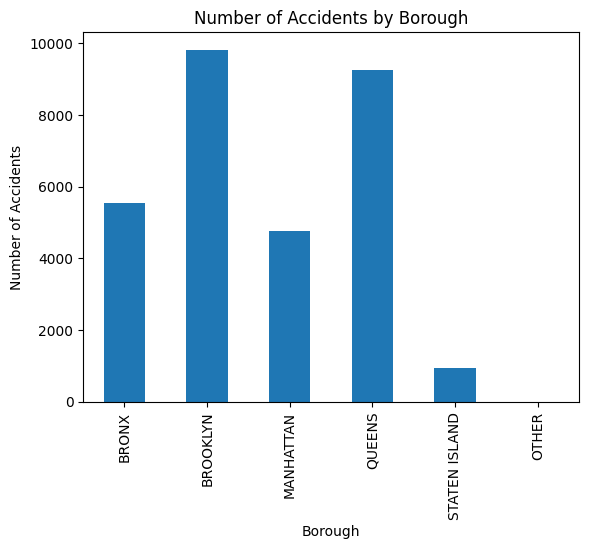

In [28]:
df = df[['BOROUGH', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].dropna()
df['BOROUGH'] = df['BOROUGH'].fillna('OTHER')

accidents_by_borough = df.groupby('BOROUGH')['BOROUGH'].count().reindex(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'OTHER'], fill_value=0)

ax = accidents_by_borough.plot(kind='bar')
ax.set_title('Number of Accidents by Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Accidents')


## Summary Statistics for Traffic Accident Injuries

In [29]:
all_injuries_summary = df['NUMBER OF PERSONS INJURED'].describe()
print('Summary statistics for number of persons injured in all NYC:')
print(all_injuries_summary)
print()


manhattan_injuries_summary = df.loc[df['BOROUGH'] == 'MANHATTAN', 'NUMBER OF PERSONS INJURED'].describe()
print('Summary statistics for number of persons injured in Manhattan:')
print(manhattan_injuries_summary)

queens_injuries_summary = df.loc[df['BOROUGH'] == 'BROOKLYN', 'NUMBER OF PERSONS INJURED'].describe()
print('Summary statistics for number of persons injured in brooklyn:')
print(queens_injuries_summary)
print()

Summary statistics for number of persons injured in all NYC:
count    30305.000000
mean         0.416697
std          0.745320
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         15.000000
Name: NUMBER OF PERSONS INJURED, dtype: float64

Summary statistics for number of persons injured in Manhattan:
count    4757.000000
mean        0.341602
std         0.630707
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: NUMBER OF PERSONS INJURED, dtype: float64
Summary statistics for number of persons injured in brooklyn:
count    9823.000000
mean        0.451186
std         0.785893
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        15.000000
Name: NUMBER OF PERSONS INJURED, dtype: float64



## Visualization: Geographic Distribution of Accidents

We will do this by:

1. Reading data and use only 3 columns of borough, latitude, longitude

2. Dropping rows with missing/null vals for latitude or longitude

3. Set up scatter plot

4. Set longitude and latitude limits



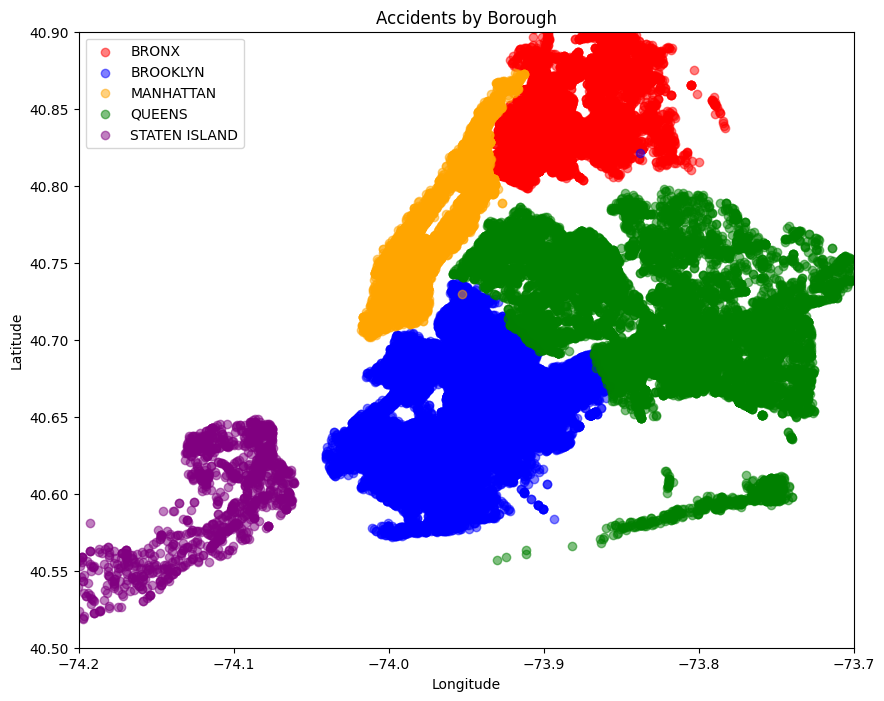

In [30]:
df = pd.read_csv('../data/raw/NYC_Accidents_2020.csv', header=3, usecols=['BOROUGH', 'LATITUDE', 'LONGITUDE'])

df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
groups = df.groupby('BOROUGH')
fig, ax = plt.subplots(figsize=(10, 8))


borough_colors = {
    'BRONX': 'red',
    'BROOKLYN': 'blue',
    'QUEENS': 'green',
    'MANHATTAN': 'orange',
    'STATEN ISLAND': 'purple'
}

for borough, group in df.groupby('BOROUGH'):
    ax.scatter(group['LONGITUDE'], group['LATITUDE'], label=borough, color=borough_colors[borough], alpha=0.5)

ax.set_xlim(-74.2, -73.7)
ax.set_ylim(40.5, 40.9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Accidents by Borough')

ax.legend()
plt.show()

## Covariance between each pair of the columns

Covariance was chosen between persons injured and persons killed, motorists killed and motorists injured, pedestrians killed and injured, cyclists killed and injured because these stats are closely related

drop rows with missing values of the columns we're interested in

calculate covariance with new dataframe of only selected columns

In [31]:
df = pd.read_csv('../data/raw/NYC_Accidents_2020.csv', header=3)


cols = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
        'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF MOTORIST INJURED',
        'NUMBER OF MOTORIST KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED']


df = df.dropna(subset=cols)
df_selected = df.loc[:, cols]
cov = df_selected.cov()
print(cov)

                               NUMBER OF PERSONS INJURED  \
NUMBER OF PERSONS INJURED                       0.527334   
NUMBER OF PERSONS KILLED                        0.000617   
NUMBER OF PEDESTRIANS INJURED                   0.042047   
NUMBER OF PEDESTRIANS KILLED                   -0.000047   
NUMBER OF MOTORIST INJURED                      0.454301   
NUMBER OF MOTORIST KILLED                       0.000708   
NUMBER OF CYCLIST INJURED                       0.030986   
NUMBER OF CYCLIST KILLED                       -0.000044   

                               NUMBER OF PERSONS KILLED  \
NUMBER OF PERSONS INJURED                      0.000617   
NUMBER OF PERSONS KILLED                       0.002267   
NUMBER OF PEDESTRIANS INJURED                 -0.000052   
NUMBER OF PEDESTRIANS KILLED                   0.000760   
NUMBER OF MOTORIST INJURED                     0.000740   
NUMBER OF MOTORIST KILLED                      0.001387   
NUMBER OF CYCLIST INJURED                     

## Which month did the most number of accidents occur?

In [32]:
df = pd.read_csv('../data/raw/NYC_Accidents_2020.csv', header=3)
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%y')
df['MONTH'] = df['CRASH DATE'].dt.month
df['MONTH'] = df['MONTH'].apply(lambda x: calendar.month_abbr[x])

month_counts = df['MONTH'].value_counts()
max_count = month_counts.max()
min_count = month_counts.min()

print("The following month had the most accidents with", max_count, "accidents:")
for month, count in month_counts.items():
    if count == max_count:
        print(month)

print("The following month had the most accidents with", min_count, "accidents:")
for month, count in month_counts.items():
    if count == min_count:
        print(month)

The following month had the most accidents with 14287 accidents:
Jan
The following month had the most accidents with 4116 accidents:
Apr


## Conclusion:

Accidents reach a lull in April perhaps due to weather conditions becoming more favorable in NYC